In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.tri as tri
import os

/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log
/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log
/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log
/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log
/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log
/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log
/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value e

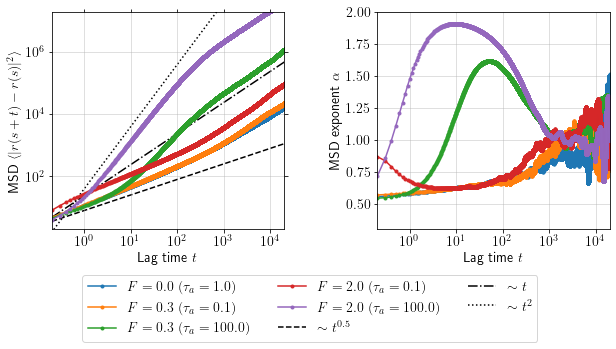

In [76]:
mpl.rcParams.update({'font.size':14, 'text.usetex':True})
fig,[ax,ax2]=plt.subplots(1,2,figsize=(10,4),gridspec_kw={'wspace':0.4, 'hspace':0.4})
ind=4
fpath='../../data/SAC_exp_free/'
for (name,tp) in [('low',1)]:#,('mid',1.0), ('high',2.)]:
    Ts,Fs,Tas=[],[],[]
    Rmax=[]
    betas=[]

    ax.clear()
    colors = pl.cm.gist_rainbow(np.linspace(0,1,5))
    count=0
    fnames=os.listdir(fpath+'MSD/')
    for fname in fnames:
        if '.npy' in fname and 'MSD' in fname and 'rep1' in fname:
            # print(fname.split('_'))
            T= float(fname.split('_')[ind].replace('T',''))
            F=float(fname.split('_')[ind+1].replace('F',''))
            Ta=float(fname.split('_')[ind+2].replace('Ta',''))
            kb=float(fname.split('_')[ind+7].replace('kb',''))
            blsize=float(fname.split('_')[ind+6].replace('blocksize',''))
            R0=float(fname.split('_')[ind+4].replace('R0',''))
            dt=float(fname.split('_')[ind+8].replace('dt',''))
            # print(T,F,Ta,Esoft,R0)
            tblck=dt*blsize
            
            npyfile=np.load(fpath+'MSD/'+fname)
            t0,=npyfile.shape
            ts=np.arange(0,npyfile.shape[0]*tblck,tblck)
            Nrep=1
            for rep in ['rep2','rep3']:
                fname_rep=fname.replace('rep1',rep)
                if fname_rep in fnames:
                    npyfile+=np.load(fpath+'MSD/'+fname_rep)
                    Nrep+=1

            npyfile=npyfile/Nrep

            Tas.append(Ta)
            Fs.append(F)
            slope=np.gradient(np.log(npyfile))/np.gradient(np.log(ts))
            slope_non_zero=np.array([xx for xx in slope if 3>xx>1e-4])
            Rmax.append(np.max(slope))
            # print(np.mean(slope_non_zero))
            
            if F==0.0 or (F==0.3 and (Ta==0.1 or Ta==100)) or (F==2 and (Ta==0.1 or Ta==100)):
                ax.loglog(ts,npyfile, '.-',label='$F={}\ (\\tau_a={})$'.format(F,Ta))
                ax2.semilogx(ts, slope, '.-',label=Ta)
                count+=1
                # ax.set_title('$\\tau_a={}$'.format(Ta))

            if F==0 and Ta==1:
                Fs.append(0)
                Tas.append(0.1)
                Rmax.append(np.max(slope))

                Fs.append(0)
                Tas.append(0.1)
                Rmax.append(np.max(slope))
                
                Fs.append(0)
                Tas.append(10)
                Rmax.append(np.max(slope))                
            
    
            
    ax.set_ylim(2,2e7)
    ax.set_xlim(2e-1,2e4)
    
    ax2.set_ylim(0.3,2.)
    ax2.set_xlim(2e-1,2e4)

    ori=np.array([1e-2,1e5])
    m=20
    t1=10.3
    # ax.axvline(t1,c='k',ls='-.')
    # ax.axvline(tblck*(10000),c='k',ls='-.')
    ax.grid(True,alpha=0.5, which='both')
    ax2.grid(True,alpha=0.5, which='both')
    
    ax.loglog(ori, 0.4*m*ori**0.5, 'k--',zorder=0,label='$\\sim t^{0.5}$')
    ax.loglog(ori, 1.2*m*ori, 'k-.',zorder=0, label='$\\sim t$')
    ax.loglog(ori,2*m*ori**2, 'k:',zorder=0,label='$\\sim t^{2}$')
    # ax.semilogx()   
    ax.set_xlabel('Lag time $t$')
    ax.set_ylabel('MSD $\\langle |r(s+t)-r(s)|^2\\rangle$')

    ax2.set_xlabel('Lag time $t$')
    ax2.set_ylabel('MSD exponent $\\alpha$')

    ax.legend(loc='lower left',ncol=3, bbox_to_anchor=(0.1,-0.55))

    ax.set_xticks([1,1e1,1e2,1e3,1e4])
    ax2.set_xticks([1,1e1,1e2,1e3,1e4])
    fig.savefig(fpath+'plots/MSD.png'.format(name), dpi=300, bbox_inches='tight')

/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: No contour levels were found within the data range.
  if __name__ == '__main__':


(0.01, 1000.0)

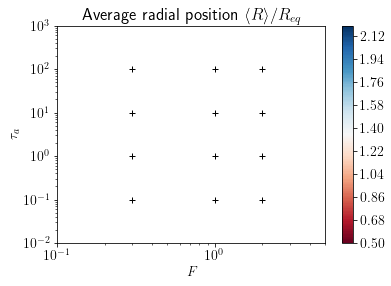

In [59]:
ax.clear()

Xi,Yi=np.meshgrid(np.unique(Fs),np.unique(Tas))
triang=tri.Triangulation(Fs,Tas)
interpZ=tri.LinearTriInterpolator(triang,np.around(np.array(Rmax), 3))
Zi=interpZ(Xi,Yi)
plt.contourf(Xi, Yi, Zi, levels=np.arange(0.5,2.2,0.01),cmap='RdBu')
plt.colorbar()
plt.contour(Xi, Yi, Zi, levels=[0.6,1])
# cs= plt.contour(Xi,Yi,Xi**2*Yi/(0.1*0.0083*T0), colors='k', levels=[1, 10,1e2,1e3],)

# plt.clabel(cs, cs.levels, inline=True,fmt=fmt, fontsize=16)

plt.plot(Fs,Tas,'k+',)
plt.xlabel('$F$')
plt.ylabel('$\\tau_a$')
# plt.xlim(1,1e3)

plt.loglog()
plt.title('Average radial position $\\langle R\\rangle/R_{eq}$')
plt.xlim(0.1,5)
plt.ylim(0.01,1e3)
# plt.savefig(fpath+'plots/normAvgR_contour.png', dpi=300, bbox_inches='tight')